In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import sys, os, git
from scipy import constants as cst
from pint import UnitRegistry
ureg = UnitRegistry()
ureg = UnitRegistry(autoconvert_offset_to_baseunit = True)

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'

In [3]:
Wood1957 = np.loadtxt("literature-data/pv-nrt.dat")

In [10]:
kB = cst.Boltzmann*ureg.J/ureg.kelvin # boltzman constant
Na = cst.Avogadro/ureg.mole # avogadro
R = kB*Na # gas constant

r_star = 3.822*ureg.angstrom # angstrom
sigma = r_star / 2**(1/6) # angstrom
N_atom = 200 # no units
T = (55 * ureg.degC).to(ureg.degK) # 55°C
volume_star = r_star**3 * Na * 2**(-0.5) 

In [26]:
jump = 10
N_atom = 200
T = (55 * ureg.degC).to(ureg.degK) # 55°C
pressure_vs_tau = []
for folder in [x[0] for x in os.walk("./")]:
    if "outputs_tau" in folder:
        pressure = np.mean(np.loadtxt(folder+"/pressure.dat")[:,1][jump:]) # atm
        pressure = (pressure*ureg.atm).to(ureg.pascal)
        tau = np.float32(folder.split("./outputs_tau")[1])
        volume = (volume_star * tau / Na).to(ureg.meter**3)
        pressure_normalized = pressure * volume / (R * T) * Na
        pressure_vs_tau.append([tau, pressure_normalized.magnitude])
pressure_vs_tau = np.array(pressure_vs_tau)

In [28]:
jump = 10
N_atom = 200
T = (55 * ureg.degC).to(ureg.degK) # 55°C
pressure_vs_tau_lmp = []
for folder in [x[0] for x in os.walk("./")]:
    if "lammps_tau" in folder:
        pressure = np.mean(np.loadtxt(folder+"/pressure.dat")[:,1][jump:]) # atm
        pressure = (pressure*ureg.atm).to(ureg.pascal)
        tau = np.float32(folder.split("./lammps_tau")[1])
        volume = (volume_star * tau / Na).to(ureg.meter**3)
        pressure_normalized = pressure * volume / (R * T) * Na
        pressure_vs_tau_lmp.append([tau, pressure_normalized.magnitude])
pressure_vs_tau_lmp = np.array(pressure_vs_tau_lmp)

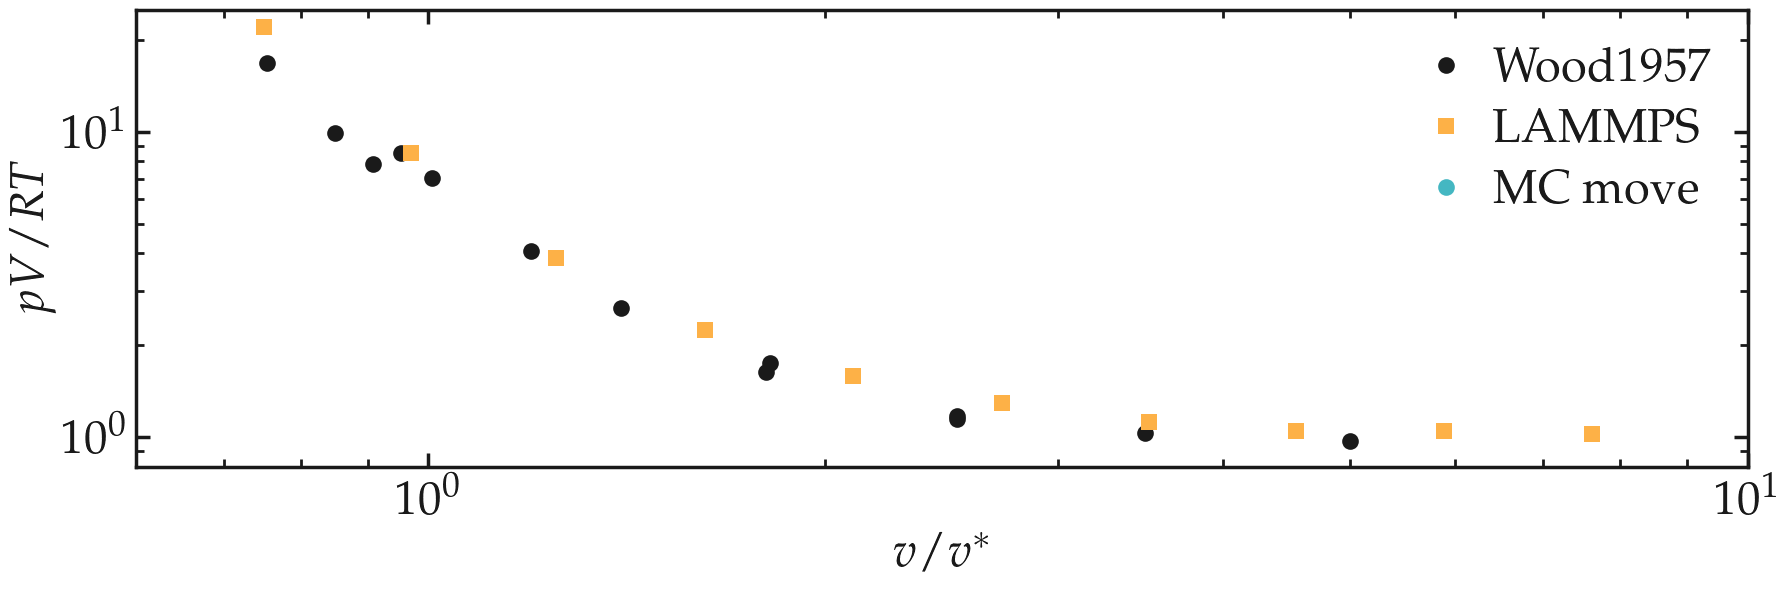

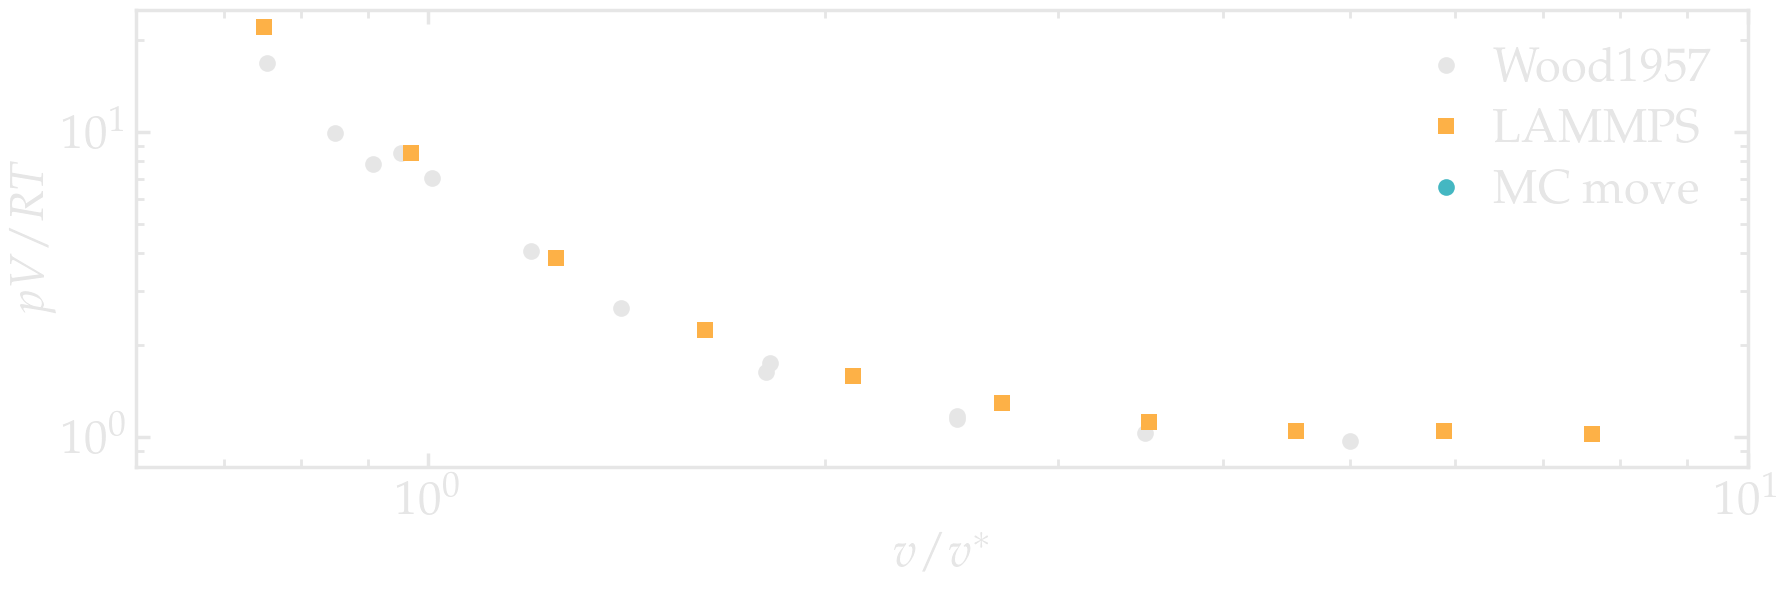

In [34]:
filename = "pv-nrt"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6), dark_mode = dark_mode,
                        transparency = True, use_serif=True)
    myplt.add_panel()
    myplt.add_plot(x = Wood1957[:,0], y = Wood1957[:,1], type = "loglog",
                   linewidth_data = 3, marker = "o", data_color = "autogray",
                   markersize = 12, data_label = r'$\mathrm{Wood1957}$')
    myplt.add_plot(x = pressure_vs_tau_lmp[:,0], y = pressure_vs_tau_lmp[:,1], type = "loglog",
                   linewidth_data = 3, marker = "s", data_color = 1,
                   markersize = 12, data_label = r'$\mathrm{LAMMPS}$')
    myplt.add_plot(x = pressure_vs_tau[:,0], y = pressure_vs_tau[:,1], type = "loglog",
                   linewidth_data = 3, marker = "o", data_color = 0,
                   markersize = 12, data_label = r'$\mathrm{MC~move}$')
    myplt.complete_panel(ylabel = r'$p V / R T$', xlabel = r'$v / v^*$',
                         xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(0.6, 10), # y_ticks=np.arange(-2., 0.6, 0.5),
                         y_boundaries=(0.8, 25))
    myplt.save_figure(filename = filename, saving_path = './')